In [206]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 
from IPython.display import display
import os
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from sklearn import preprocessing,cross_validation,ensemble,metrics,svm,grid_search,decomposition,feature_selection,linear_model
import seaborn as sns
from functools import partial
from datetime import datetime
from sklearn.cross_validation import  train_test_split

In [207]:
#set current working directory 
cwd = os.getcwd()
os.chdir("C:/Users/mukul")

#read test and train datasets
zillow_train  = pd.read_csv("./Downloads/training_ZILLOW_CONFIDENTIAL.csv")


#drop unwanted id column
#zillow_train.drop(['DateDiff'], axis=1, inplace=True)
zillow_train.info()
zillow_train.describe()
zillow_train

#check final dtype of each variable 



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2553 entries, 0 to 2552
Data columns (total 26 columns):
propertyid                       2553 non-null int64
transdate                        2553 non-null object
transvalue                       2553 non-null int64
transdate_previous               1681 non-null object
transvalue_previous              1681 non-null float64
Price_Appreciation               2553 non-null int64
bathroomcnt                      2538 non-null float64
bedroomcnt                       2536 non-null float64
builtyear                        2539 non-null float64
BuiltDecade                      2553 non-null int64
finishedsquarefeet               2539 non-null float64
lotsizesquarefeet                2553 non-null int64
Unbuilt_sq_ft                    2553 non-null int64
storycnt                         2539 non-null float64
lattitude_corrected              2553 non-null float64
latitude                         2553 non-null int64
longitude_corrected          

,propertyid,transdate,transvalue,transdate_previous,transvalue_previous,Price_Appreciation,bathroomcnt,bedroomcnt,builtyear,BuiltDecade,...,longitude_corrected,longitude,usecode,censustract,viewtypeid,Population Density per decade,Address,National_Population,Population_Change,AnnualPercentChange
0,48650729,11/16/2005,231000,12/16/1994,129500.0,101500,2.00,3.0,1964.0,1960,...,-122.282926,-122282926,9,28200.0,NaN,439.78,"4030 S 150th St, Tukwila, WA 98188, USA",191888791.0,2646993,1.39
1,48650769,9/23/2005,229950,11-Mar-98,138000.0,91950,0.75,2.0,1942.0,1940,...,-122.283976,-122283976,9,28200.0,NaN,237.51,"4003 S 150th St, Tukwila, WA 98188, USA",134859553.0,1457082,1.09
2,48650769,9/23/2005,229950,7/26/2002,184000.0,45950,0.75,2.0,1942.0,1940,...,-122.283976,-122283976,9,28200.0,NaN,237.51,"4003 S 150th St, Tukwila, WA 98188, USA",134859553.0,1457082,1.09
3,48650837,11/29/2005,60000,NaN,NaN,60000,1.00,3.0,1935.0,1940,...,-122.275028,-122275028,9,28200.0,NaN,237.51,"4615 S 148th St, Tukwila, WA 98168, USA",127250232.0,876459,0.69
4,48651057,11/16/2005,1010000,5/30/1995,552000.0,458000,2.25,4.0,1991.0,1990,...,-122.355990,-122355990,9,30100.0,3.0,708.95,"30035 16th Ave SW, Federal Way, WA 98023, USA",252153092.0,2688696,1.08
5,48651057,11/16/2005,1010000,11/28/2000,700000.0,310000,2.25,4.0,1991.0,1990,...,-122.355990,-122355990,9,30100.0,3.0,708.95,"30035 16th Ave SW, Federal Way, WA 98023, USA",252153092.0,2688696,1.08
6,48651301,10-04-2005,327450,9/20/1989,129950.0,197500,2.25,4.0,1989.0,1990,...,-122.284696,-122284696,9,29801.0,NaN,708.95,"3943 S 271st Pl, Kent, WA 98032, USA",246819230.0,2320248,0.94
7,48651493,11/17/2005,389000,5/15/1995,157000.0,232000,1.00,2.0,1911.0,1910,...,-122.315814,-122315814,9,4400.0,NaN,133.88,"1108 NE 55th St, Seattle, WA 98105, USA",93863000.0,1456000,1.56
8,48651493,11/17/2005,389000,11/24/1997,136000.0,253000,1.00,2.0,1911.0,1910,...,-122.315814,-122315814,9,4400.0,NaN,133.88,"1108 NE 55th St, Seattle, WA 98105, USA",93863000.0,1456000,1.56
9,48651493,11/17/2005,389000,9/29/1998,204500.0,184500,1.00,2.0,1911.0,1910,...,-122.315814,-122315814,9,4400.0,NaN,133.88,"1108 NE 55th St, Seattle, WA 98105, USA",93863000.0,1456000,1.56


In [208]:
#read test set
zillow_test  = pd.read_csv("./Downloads/test_ZILLOW_CONFIDENTIAL (2).csv")
zillow_test.info()
zillow_test.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2496 entries, 0 to 2495
Data columns (total 26 columns):
propertyid                       2496 non-null int64
transdate                        2496 non-null object
transvalue                       0 non-null float64
transdate_previous               1674 non-null object
Price_Appreciation               2496 non-null int64
transvalue_previous              1674 non-null float64
bathroomcnt                      2492 non-null float64
bedroomcnt                       2488 non-null float64
builtyear                        2493 non-null float64
BuiltDecade                      2496 non-null int64
finishedsquarefeet               2493 non-null float64
lotsizesquarefeet                2496 non-null int64
Unbuilt_sq_ft                    2496 non-null int64
storycnt                         2493 non-null float64
latitude_corrected               2496 non-null float64
latitude                         2496 non-null int64
longitude_corrected           

(2496, 26)

In [209]:
#extract zipcode fro trainiing set
zillow_train['Zipcode'] = zillow_train['Address'].str.extract(r'(\d{5})')
zillow_train['Zipcode'] = pd.to_numeric(zillow_train['Zipcode'], errors='coerce')
zillow_train.Zipcode

#extract zipcode fro test set
zillow_test['Zipcode'] = zillow_test['Address'].str.extract(r'(\d{5})')
zillow_test['Zipcode'] = pd.to_numeric(zillow_test['Zipcode'], errors='coerce')
zillow_test.Zipcode



C:\Users\mukul\Anaconda2\lib\site-packages\ipykernel\__main__.py:2: FutureWarning: currently extract(expand=None) means expand=False (return Index/Series/DataFrame) but in a future version of pandas this will be changed to expand=True (return DataFrame)
  from ipykernel import kernelapp as app
C:\Users\mukul\Anaconda2\lib\site-packages\ipykernel\__main__.py:7: FutureWarning: currently extract(expand=None) means expand=False (return Index/Series/DataFrame) but in a future version of pandas this will be changed to expand=True (return DataFrame)


0       17734.0
1       17734.0
2       10815.0
3       98002.0
4       98002.0
5       98002.0
6       98002.0
7       98002.0
8       16506.0
9       98040.0
10      98136.0
11      98126.0
12      98059.0
13      98116.0
14      98126.0
15      98126.0
16      98103.0
17      98003.0
18      32102.0
19      98023.0
20      32610.0
21      32713.0
22      10031.0
23      98023.0
24      98023.0
25      98028.0
26      98028.0
27      98028.0
28      98028.0
29      98028.0
         ...   
2466        NaN
2467        NaN
2468        NaN
2469        NaN
2470        NaN
2471        NaN
2472        NaN
2473        NaN
2474        NaN
2475        NaN
2476        NaN
2477        NaN
2478        NaN
2479        NaN
2480        NaN
2481        NaN
2482        NaN
2483        NaN
2484        NaN
2485        NaN
2486        NaN
2487        NaN
2488        NaN
2489        NaN
2490        NaN
2491        NaN
2492        NaN
2493        NaN
2494        NaN
2495        NaN
Name: Zipcode, dtype: fl

In [210]:
#check missing no of values for both test and train
def num_missing(x):
  return sum(x.isnull())
zillow_train.apply(num_missing, axis=0)

propertyid                          0
transdate                           0
transvalue                          0
transdate_previous                872
transvalue_previous               872
Price_Appreciation                  0
bathroomcnt                        15
bedroomcnt                         17
builtyear                          14
BuiltDecade                         0
finishedsquarefeet                 14
lotsizesquarefeet                   0
Unbuilt_sq_ft                       0
storycnt                           14
lattitude_corrected                 0
latitude                            0
longitude_corrected                 0
longitude                           0
usecode                             0
censustract                         4
viewtypeid                       1995
Population Density per decade      14
Address                             0
National_Population               215
Population_Change                 215
AnnualPercentChange               215
Zipcode     

In [211]:
def num_missing(x):
  return sum(x.isnull())
zillow_test.apply(num_missing, axis=0)

propertyid                          0
transdate                           0
transvalue                       2496
transdate_previous                822
Price_Appreciation                  0
transvalue_previous               822
bathroomcnt                         4
bedroomcnt                          8
builtyear                           3
BuiltDecade                         0
finishedsquarefeet                  3
lotsizesquarefeet                   0
Unbuilt_sq_ft                       0
storycnt                            3
latitude_corrected                  0
latitude                            0
longitude_corrected                 0
longitude                           0
usecode                             0
censustract                         0
viewtypeid                       1943
Population Density per decade       3
National_Population               217
Population_Change                 217
AnnualPercentChange               217
Address                           585
Zipcode     

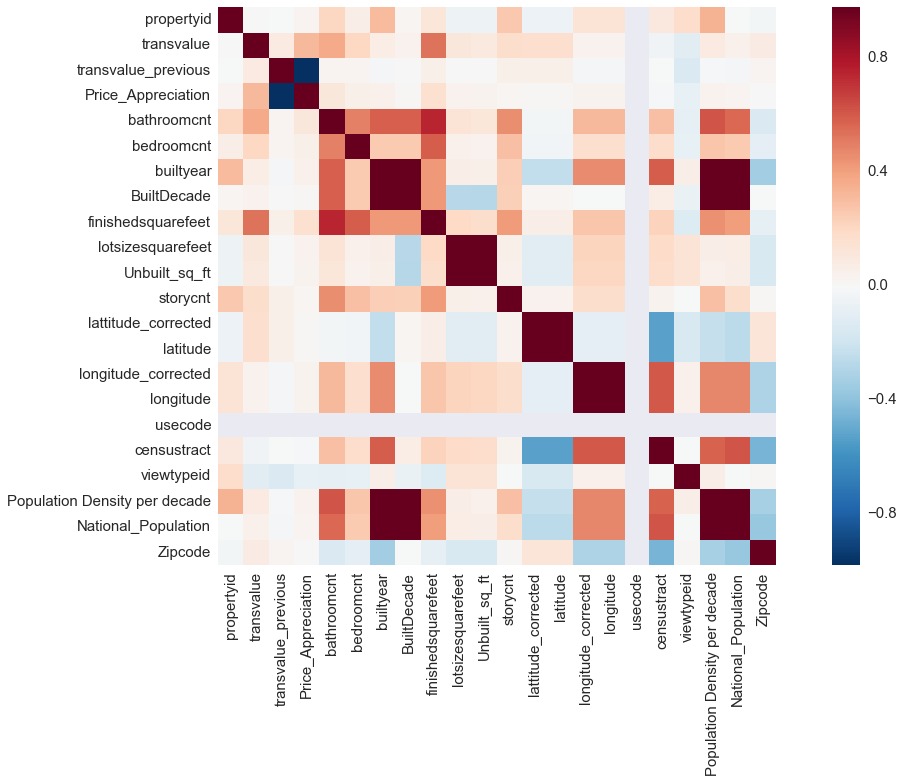

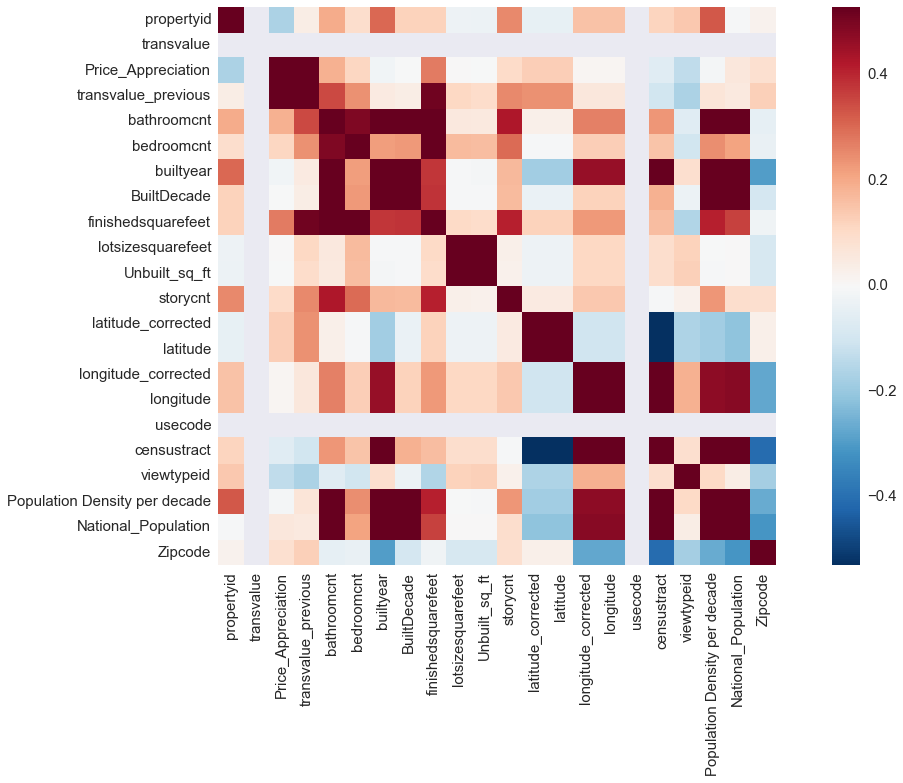

In [212]:
#see corelation in both test and train
d = zillow_train
corrmat = d.corr()

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(20, 10))

# Draw the heatmap using seaborn
sns.heatmap(corrmat, vmax=.1, square=True)

d = zillow_test
corrmat = d.corr()

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(20, 10))

# Draw the heatmap using seaborn
sns.heatmap(corrmat, vmax=.1, square=True)

In [213]:
#preprocessing and transformation

#zillow_train.info()
#drop corelated columns and they add noise to the model
zillow_train.drop(['propertyid','Address','BuiltDecade','lattitude_corrected','longitude_corrected','Unbuilt_sq_ft','National_Population'], axis=1, inplace=True)
#zillow_train['viewtypeid']=zillow_train['viewtypeid'].astype('object')


#change date type frm object to datetime64
zillow_train['transdate']=pd.to_datetime(zillow_train['transdate'],coerce=True)
nulls=zillow_train['transdate'][zillow_train['transdate'].notnull()==False]

zillow_train['transdate_previous']=pd.to_datetime(zillow_train['transdate_previous'],coerce=True)
nulls=zillow_train['transdate_previous'][zillow_train['transdate_previous'].notnull()==False]


#change other float types to numeric 
zillow_train['Population_Change'] = pd.to_numeric(zillow_train['Population_Change'], errors='coerce')
zillow_train['AnnualPercentChange'] = pd.to_numeric(zillow_train['AnnualPercentChange'], errors='coerce')

#change ordinal variable to category type instead of object
zillow_train['viewtypeid']=zillow_train['viewtypeid'].astype('category')
zillow_train.info()

# Separate Numerical and Catergorical Variables for further processing
le = preprocessing.LabelEncoder()
train_str = zillow_train.select_dtypes(include=['object','datetime64[ns]','category'])

#Get Numerical Variables only 
zillow_train.drop(train_str.columns.values,axis=1,inplace=True)




C:\Users\mukul\Anaconda2\lib\site-packages\ipykernel\__main__.py:10: FutureWarning: the coerce=True keyword is deprecated, use errors='coerce' instead
C:\Users\mukul\Anaconda2\lib\site-packages\ipykernel\__main__.py:13: FutureWarning: the coerce=True keyword is deprecated, use errors='coerce' instead


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2553 entries, 0 to 2552
Data columns (total 20 columns):
transdate                        2553 non-null datetime64[ns]
transvalue                       2553 non-null int64
transdate_previous               1681 non-null datetime64[ns]
transvalue_previous              1681 non-null float64
Price_Appreciation               2553 non-null int64
bathroomcnt                      2538 non-null float64
bedroomcnt                       2536 non-null float64
builtyear                        2539 non-null float64
finishedsquarefeet               2539 non-null float64
lotsizesquarefeet                2553 non-null int64
storycnt                         2539 non-null float64
latitude                         2553 non-null int64
longitude                        2553 non-null int64
usecode                          2553 non-null int64
censustract                      2549 non-null float64
viewtypeid                       558 non-null category
Population 

In [214]:

zillow_test.drop(['transvalue','propertyid','Address','BuiltDecade','latitude_corrected','longitude_corrected','Unbuilt_sq_ft','National_Population'], axis=1, inplace=True)
#zillow_train['viewtypeid']=zillow_train['viewtypeid'].astype('object')

zillow_test['transdate']=pd.to_datetime(zillow_test['transdate'],coerce=True)
nulls=zillow_test['transdate'][zillow_test['transdate'].notnull()==False]

zillow_test['transdate_previous']=pd.to_datetime(zillow_test['transdate_previous'],coerce=True)
nulls=zillow_test['transdate_previous'][zillow_test['transdate_previous'].notnull()==False]


zillow_test['Population_Change'] = pd.to_numeric(zillow_test['Population_Change'], errors='coerce')
zillow_test['AnnualPercentChange'] = pd.to_numeric(zillow_test['AnnualPercentChange'], errors='coerce')
zillow_test['viewtypeid']=zillow_test['viewtypeid'].astype('category')
zillow_test['Zipcode'] = pd.to_numeric(zillow_test['Zipcode'], errors='coerce')
zillow_test.info()
# Separate Numerical and Catergorical Variables for further processing
le = preprocessing.LabelEncoder()
#train_str = zillow_train.select_dtypes(include=['object','datetime64[ns]','category'])
test_str = zillow_test.select_dtypes(include=['object','datetime64[ns]','category']) 
#display(train_str.head())
#print(train_str.columns.values)
#print(zillow_train.columns.values)

#Get Numerical Variables only 
zillow_test.drop(test_str.columns.values,axis=1,inplace=True)

C:\Users\mukul\Anaconda2\lib\site-packages\ipykernel\__main__.py:5: FutureWarning: the coerce=True keyword is deprecated, use errors='coerce' instead
C:\Users\mukul\Anaconda2\lib\site-packages\ipykernel\__main__.py:8: FutureWarning: the coerce=True keyword is deprecated, use errors='coerce' instead


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2496 entries, 0 to 2495
Data columns (total 19 columns):
transdate                        2496 non-null datetime64[ns]
transdate_previous               1674 non-null datetime64[ns]
Price_Appreciation               2496 non-null int64
transvalue_previous              1674 non-null float64
bathroomcnt                      2492 non-null float64
bedroomcnt                       2488 non-null float64
builtyear                        2493 non-null float64
finishedsquarefeet               2493 non-null float64
lotsizesquarefeet                2496 non-null int64
storycnt                         2493 non-null float64
latitude                         2496 non-null int64
longitude                        2496 non-null int64
usecode                          2496 non-null int64
censustract                      2496 non-null int64
viewtypeid                       553 non-null category
Population Density per decade    2493 non-null float64
Population_

In [215]:
#imputation Numeric variables 
from sklearn.base import TransformerMixin
class DataFrameImputer(TransformerMixin):
    def fit(self, X, y=None):
        self.fill = pd.Series([X[c].value_counts().index[0]
            if X[c].dtype == np.dtype('O') else X[c].mean() for c in X],
            index=X.columns)
        return self
    def transform(self, X, y=None):
        return X.fillna(self.fill)

In [216]:

big_X_imputed_train = DataFrameImputer().fit_transform(zillow_train)
#big_X_imputed_test = DataFrameImputer().fit_transform(zillow_train_test)  
big_X_imputed_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2553 entries, 0 to 2552
Data columns (total 17 columns):
transvalue                       2553 non-null int64
transvalue_previous              2553 non-null float64
Price_Appreciation               2553 non-null int64
bathroomcnt                      2553 non-null float64
bedroomcnt                       2553 non-null float64
builtyear                        2553 non-null float64
finishedsquarefeet               2553 non-null float64
lotsizesquarefeet                2553 non-null int64
storycnt                         2553 non-null float64
latitude                         2553 non-null int64
longitude                        2553 non-null int64
usecode                          2553 non-null int64
censustract                      2553 non-null float64
Population Density per decade    2553 non-null float64
Population_Change                2553 non-null float64
AnnualPercentChange              2553 non-null float64
Zipcode                  

In [217]:


#big_X_imputed_train['bathroomcnt']=big_X_imputed_train['bathroomcnt'].astype(int)
big_X_imputed_train['bedroomcnt']=big_X_imputed_train['bedroomcnt'].astype(int)
big_X_imputed_train['builtyear']=big_X_imputed_train['builtyear'].astype(int)
big_X_imputed_train['finishedsquarefeet']=big_X_imputed_train['finishedsquarefeet'].astype(int)
big_X_imputed_train['storycnt']=big_X_imputed_train['storycnt'].astype(int)
big_X_imputed_train['censustract']=big_X_imputed_train['censustract'].astype(int)
big_X_imputed_train['Population_Change']=big_X_imputed_train['Population_Change'].astype(int)
big_X_imputed_train['AnnualPercentChange']=big_X_imputed_train['AnnualPercentChange'].astype(int)
big_X_imputed_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2553 entries, 0 to 2552
Data columns (total 17 columns):
transvalue                       2553 non-null int64
transvalue_previous              2553 non-null float64
Price_Appreciation               2553 non-null int64
bathroomcnt                      2553 non-null float64
bedroomcnt                       2553 non-null int32
builtyear                        2553 non-null int32
finishedsquarefeet               2553 non-null int32
lotsizesquarefeet                2553 non-null int64
storycnt                         2553 non-null int32
latitude                         2553 non-null int64
longitude                        2553 non-null int64
usecode                          2553 non-null int64
censustract                      2553 non-null int32
Population Density per decade    2553 non-null float64
Population_Change                2553 non-null int32
AnnualPercentChange              2553 non-null int32
Zipcode                          2553 n

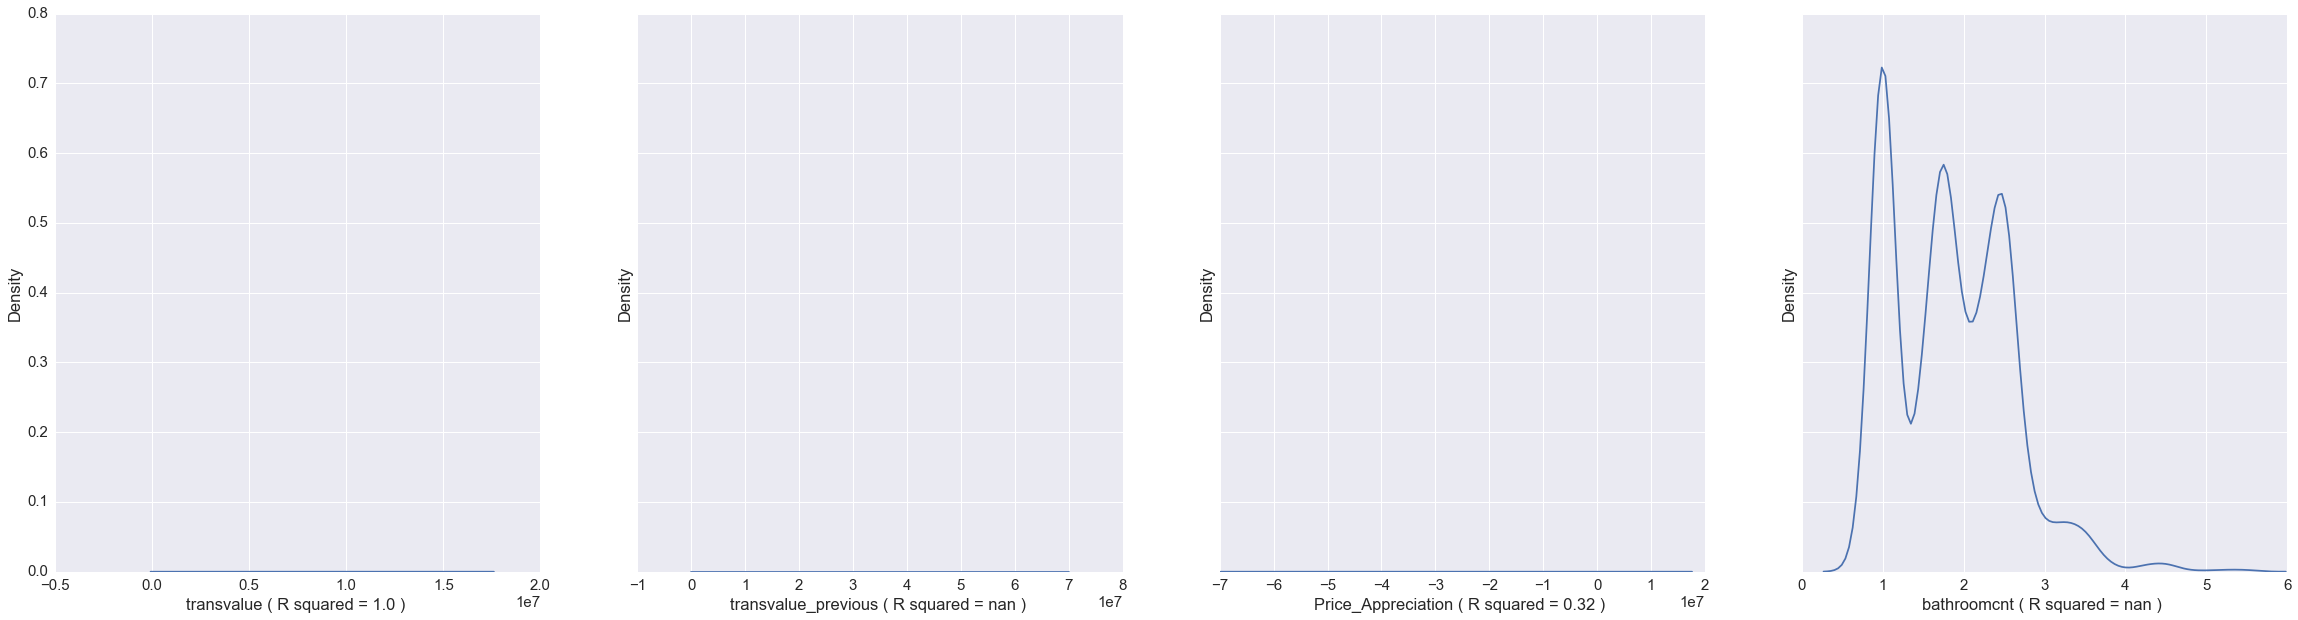

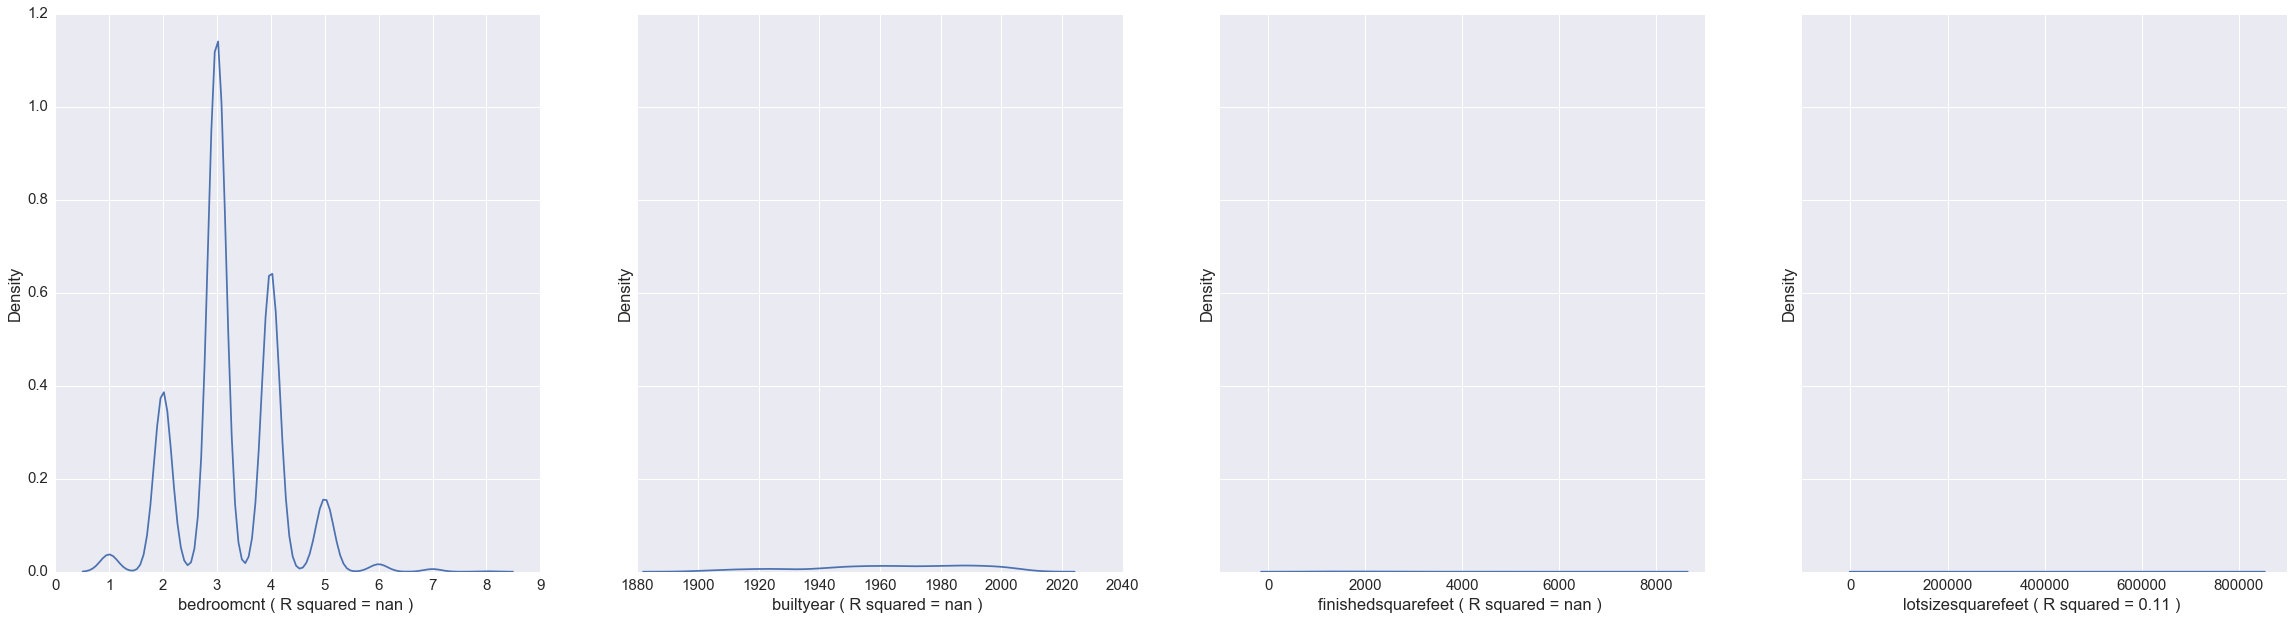

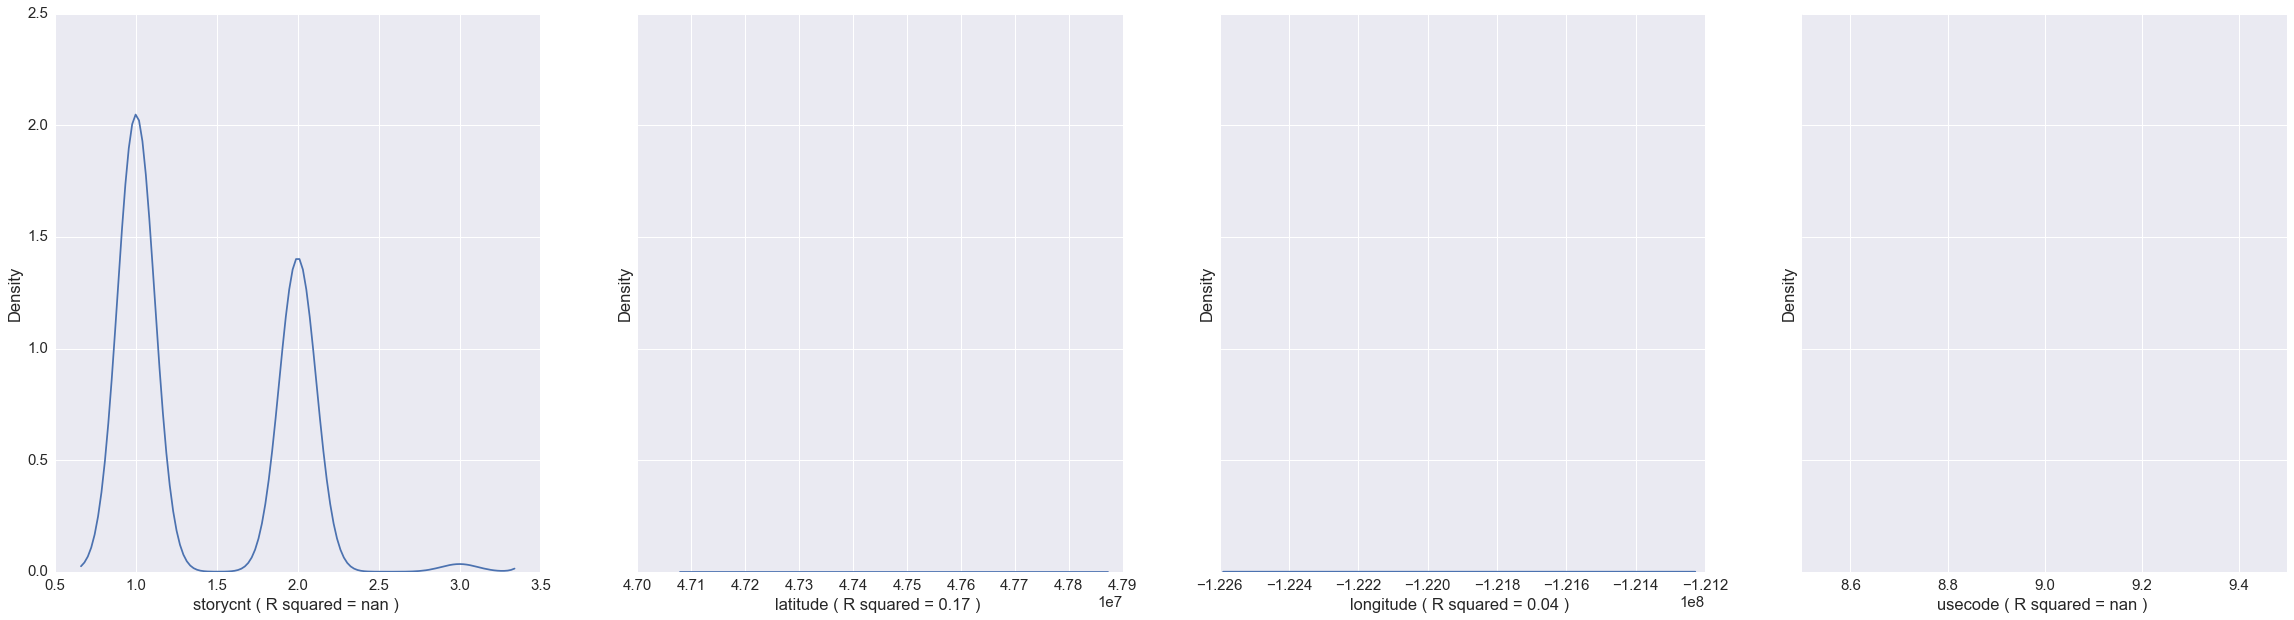

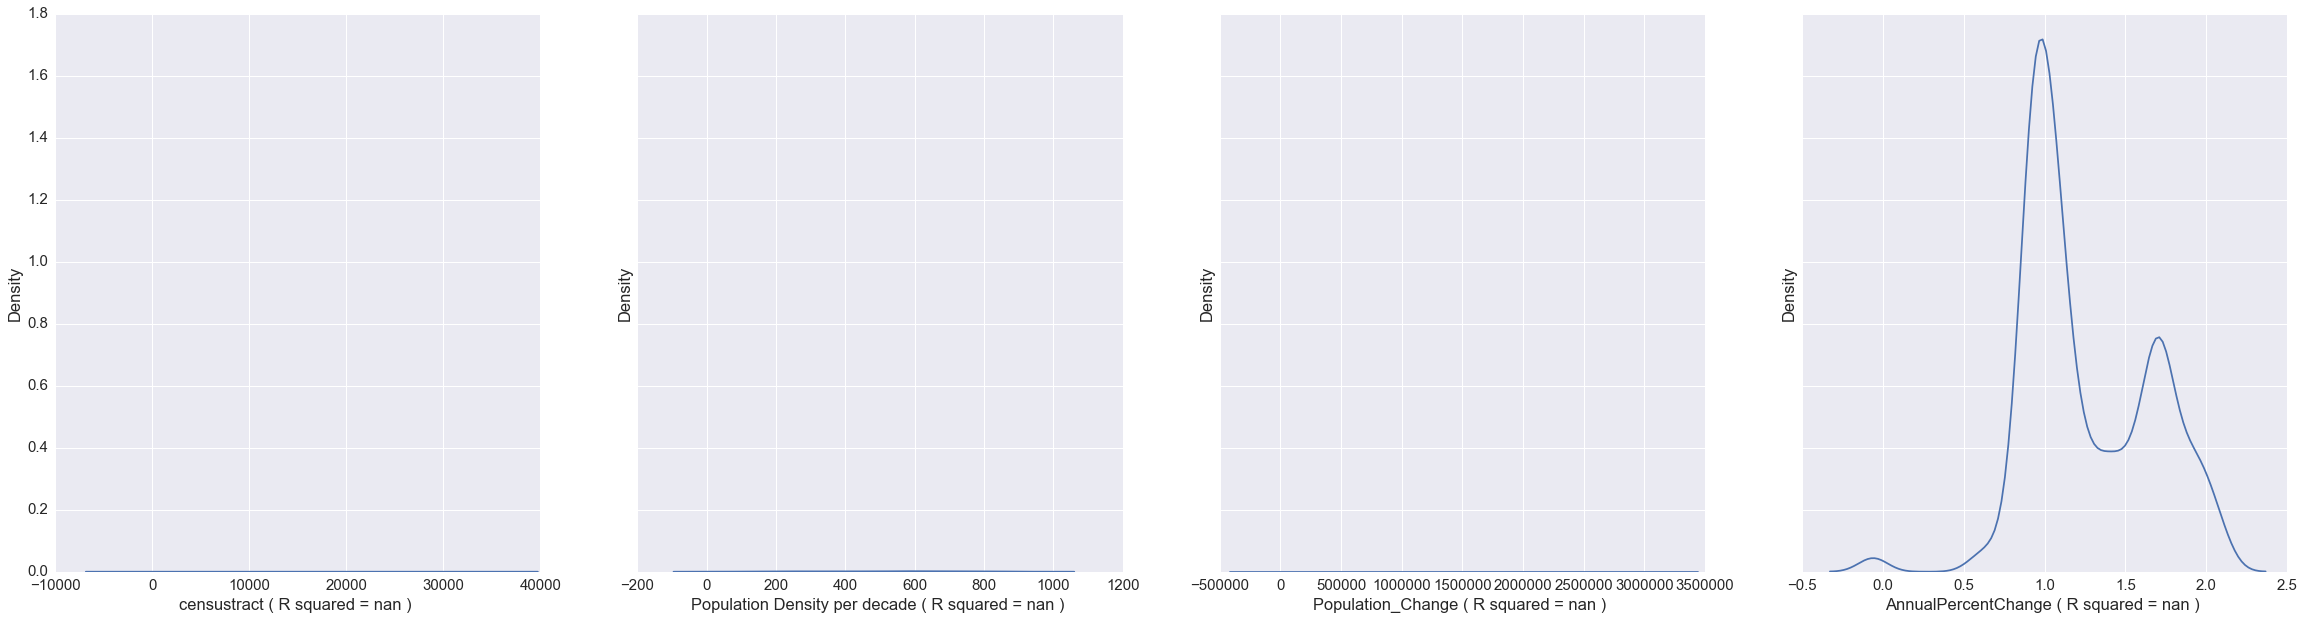

In [218]:
#EDA
#univariate analysis - Plots
ncol = 4
nrow = 4
for i in range(nrow):
    fig,axs = plt.subplots(nrows=1,ncols=ncol,sharey=True,figsize=(40, 10))
    cols = zillow_train.columns[i*ncol:ncol*(i+1)]
    for i in range(len(axs)):
        sns.distplot(zillow_train[cols[i]], ax=axs[i], hist=False)
        xlabel=cols[i]+" ( R squared = "+str(round(np.corrcoef(zillow_train.transvalue, zillow_train[cols[i]])[0,1],2))+" ) "
        axs[i].set(xlabel=xlabel, ylabel='Density')

C:\Users\mukul\Anaconda2\lib\site-packages\matplotlib\axes\_base.py:2787: UserWarning: Attempting to set identical left==right results
in singular transformations; automatically expanding.
left=9.0, right=9.0
  'left=%s, right=%s') % (left, right))
C:\Users\mukul\Anaconda2\lib\site-packages\matplotlib\axes\_base.py:3045: UserWarning: Attempting to set identical bottom==top results
in singular transformations; automatically expanding.
bottom=9.0, top=9.0
  'bottom=%s, top=%s') % (bottom, top))


LinAlgError: singular matrix

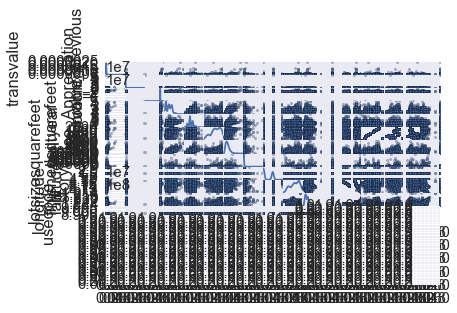

In [219]:
pd.tools.plotting.scatter_matrix(zillow_train, diagonal="kde")
plt.tight_layout()
plt.show()

IndexError: index 2 is out of bounds for axis 0 with size 2

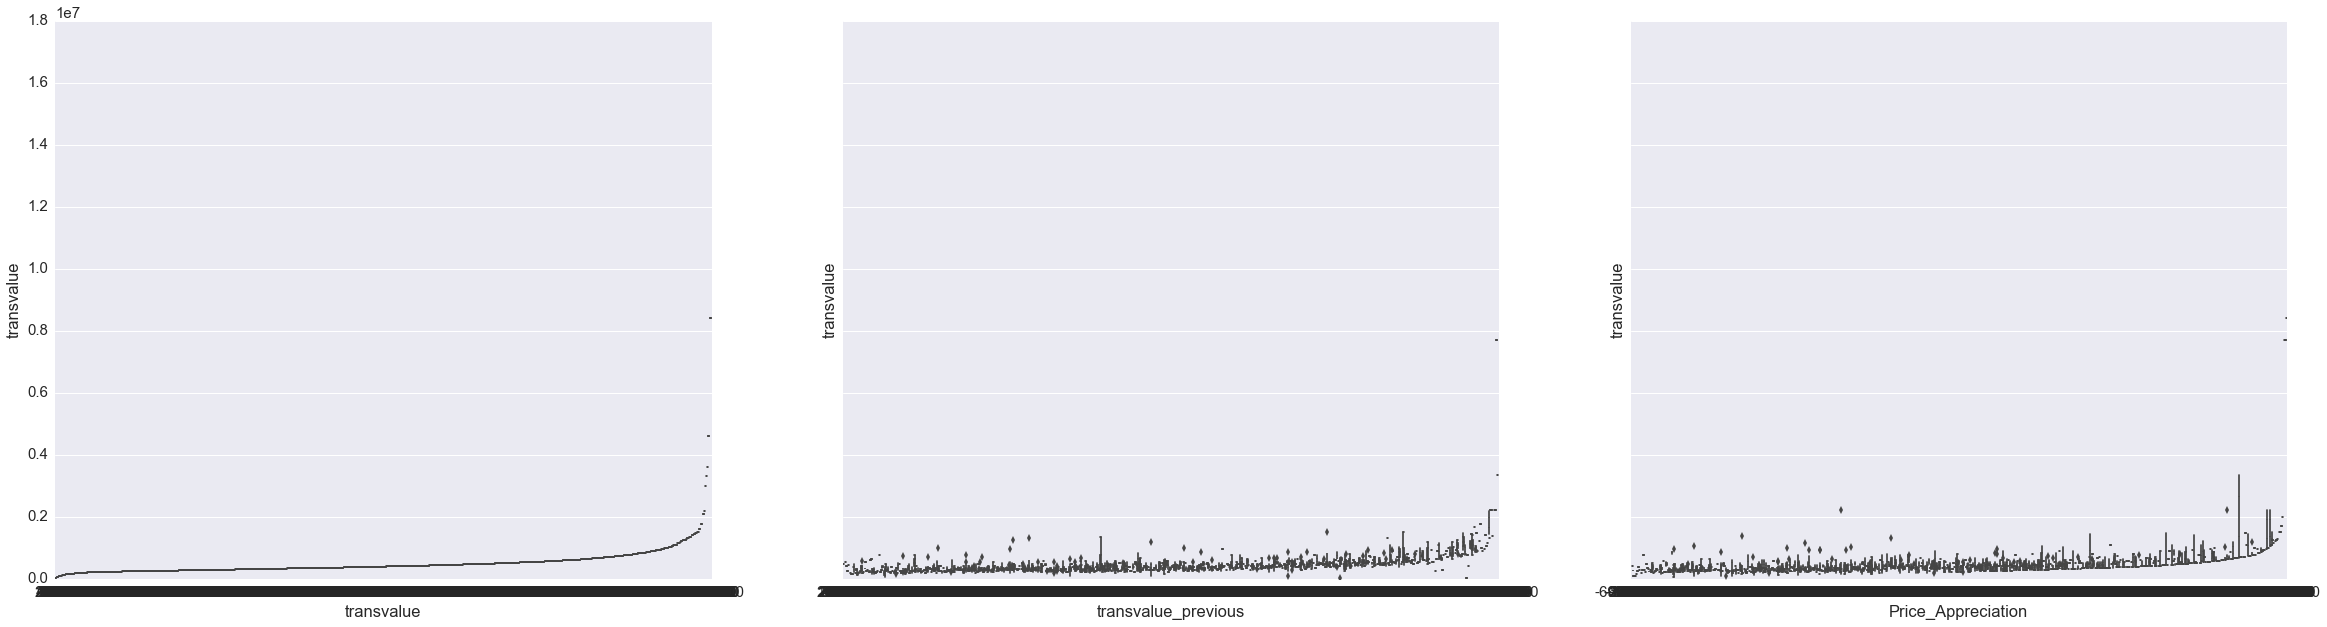

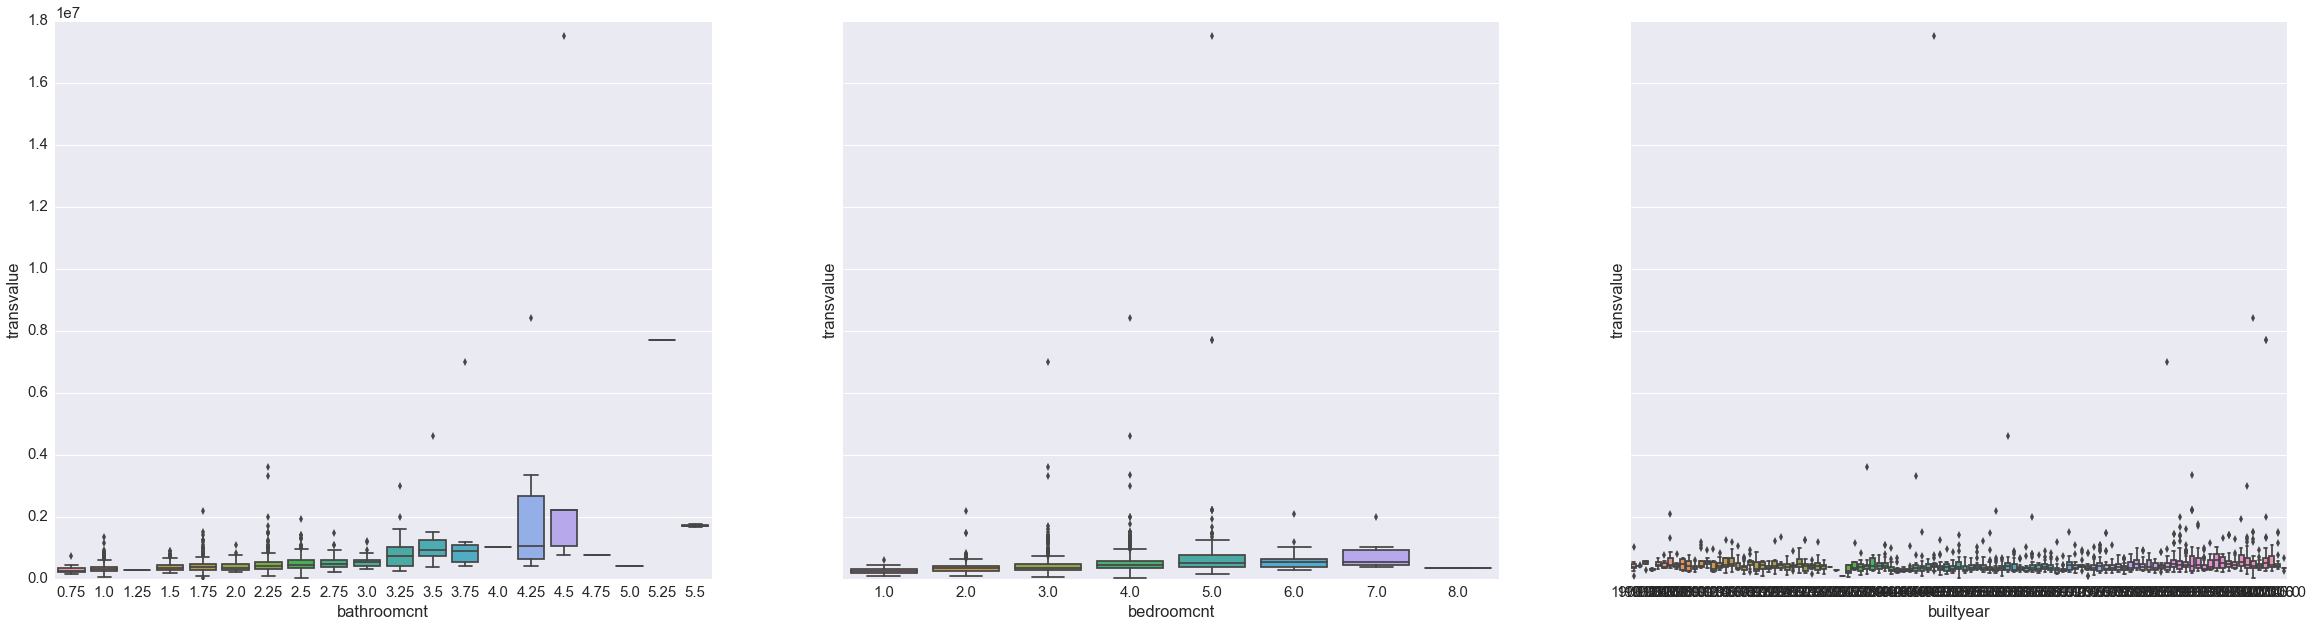

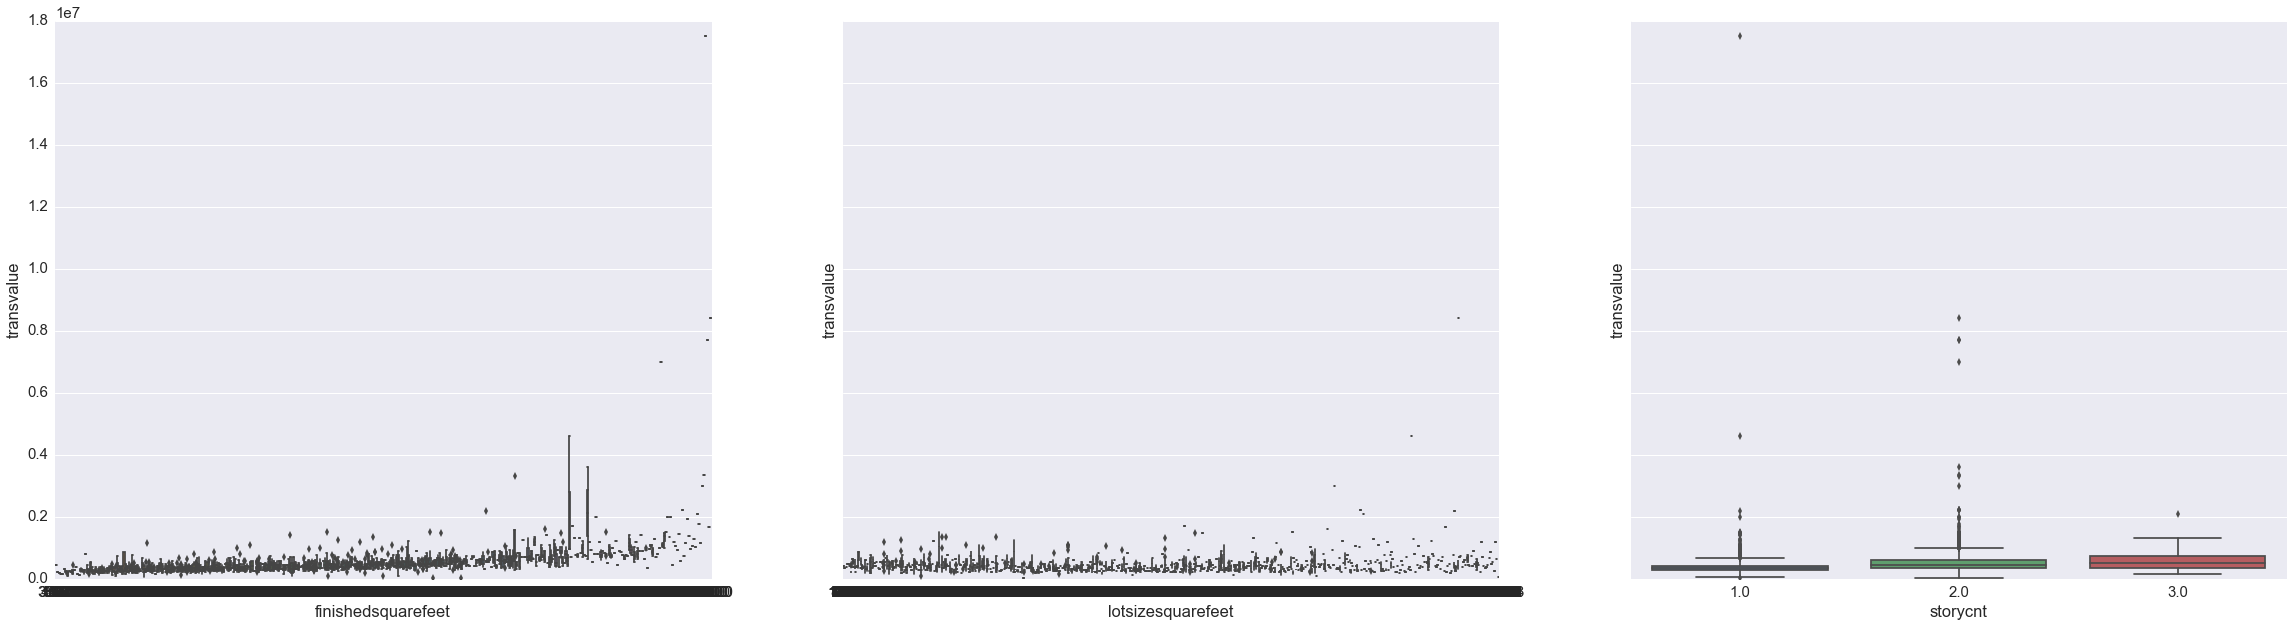

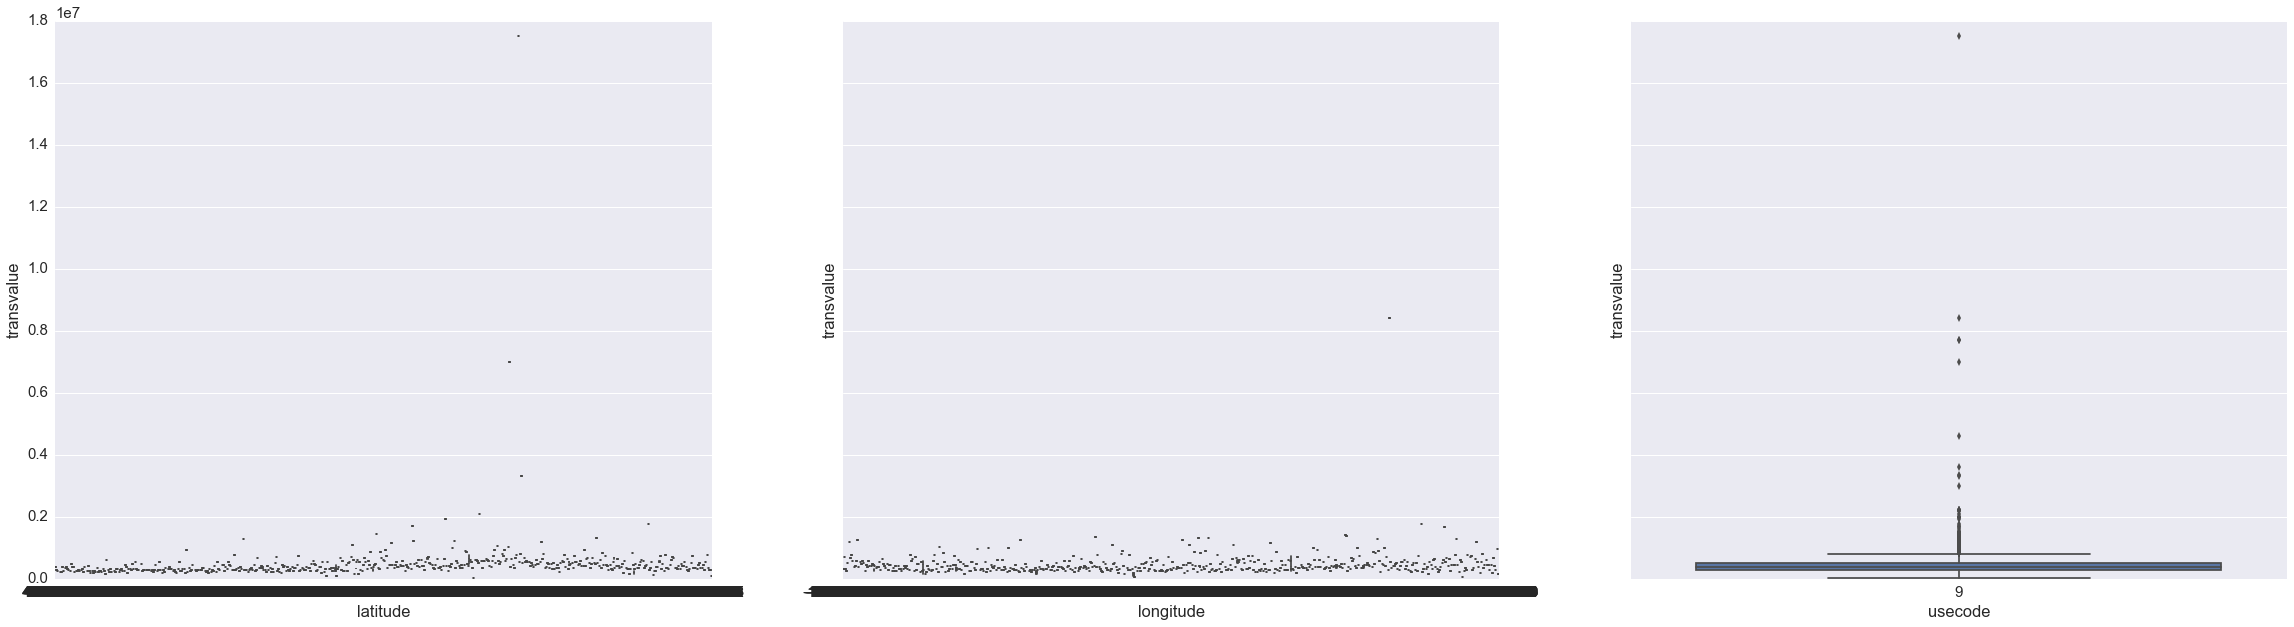

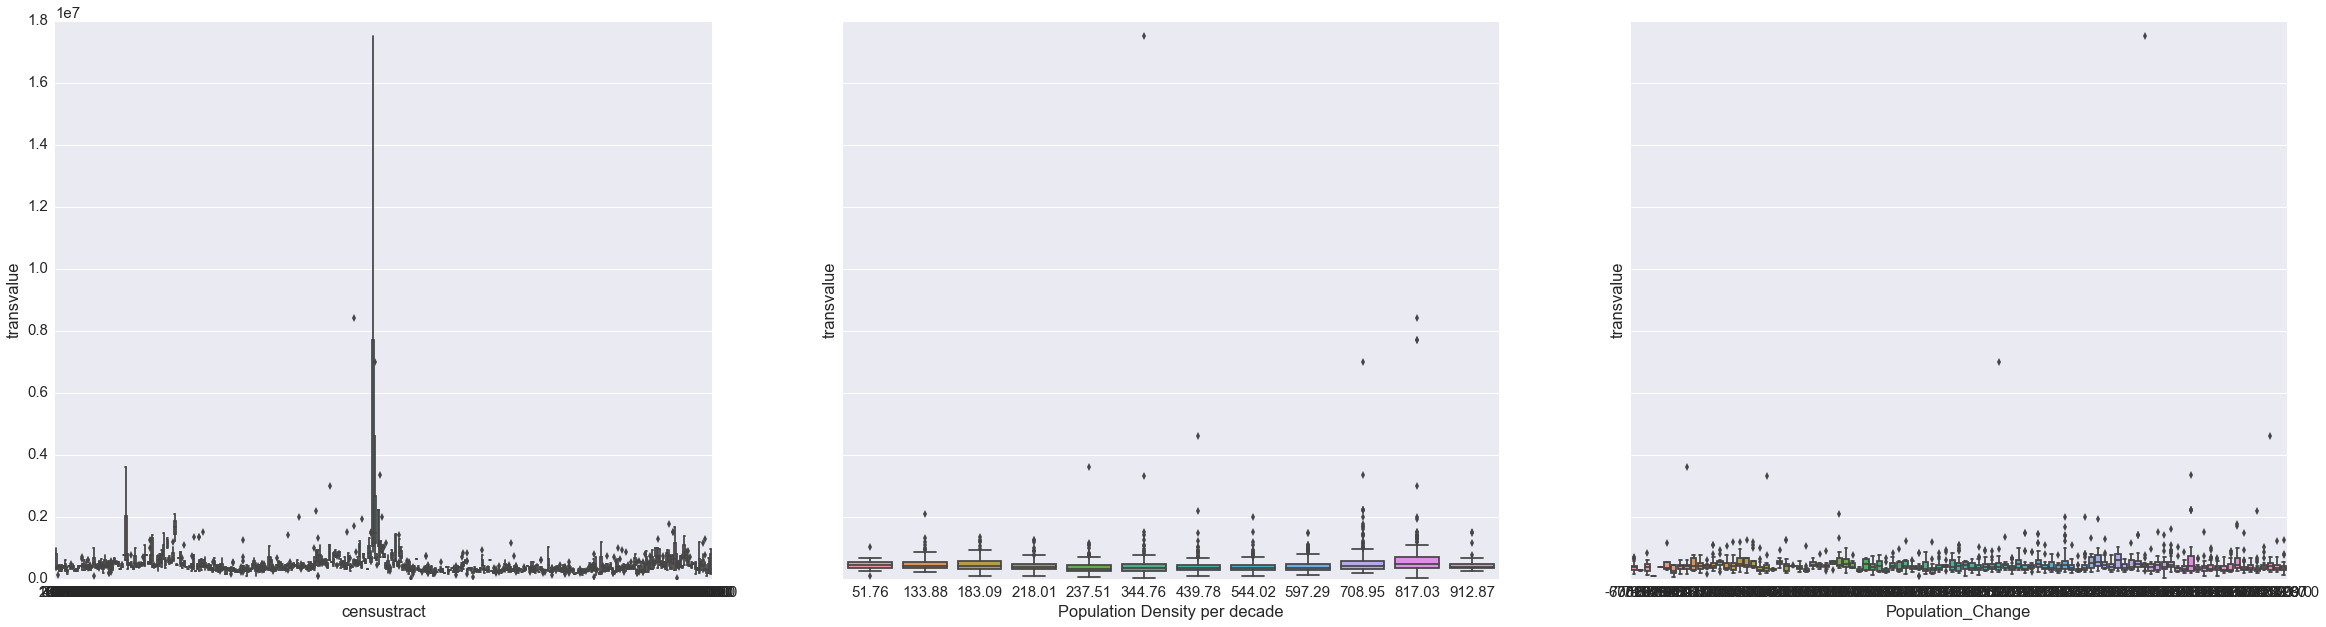

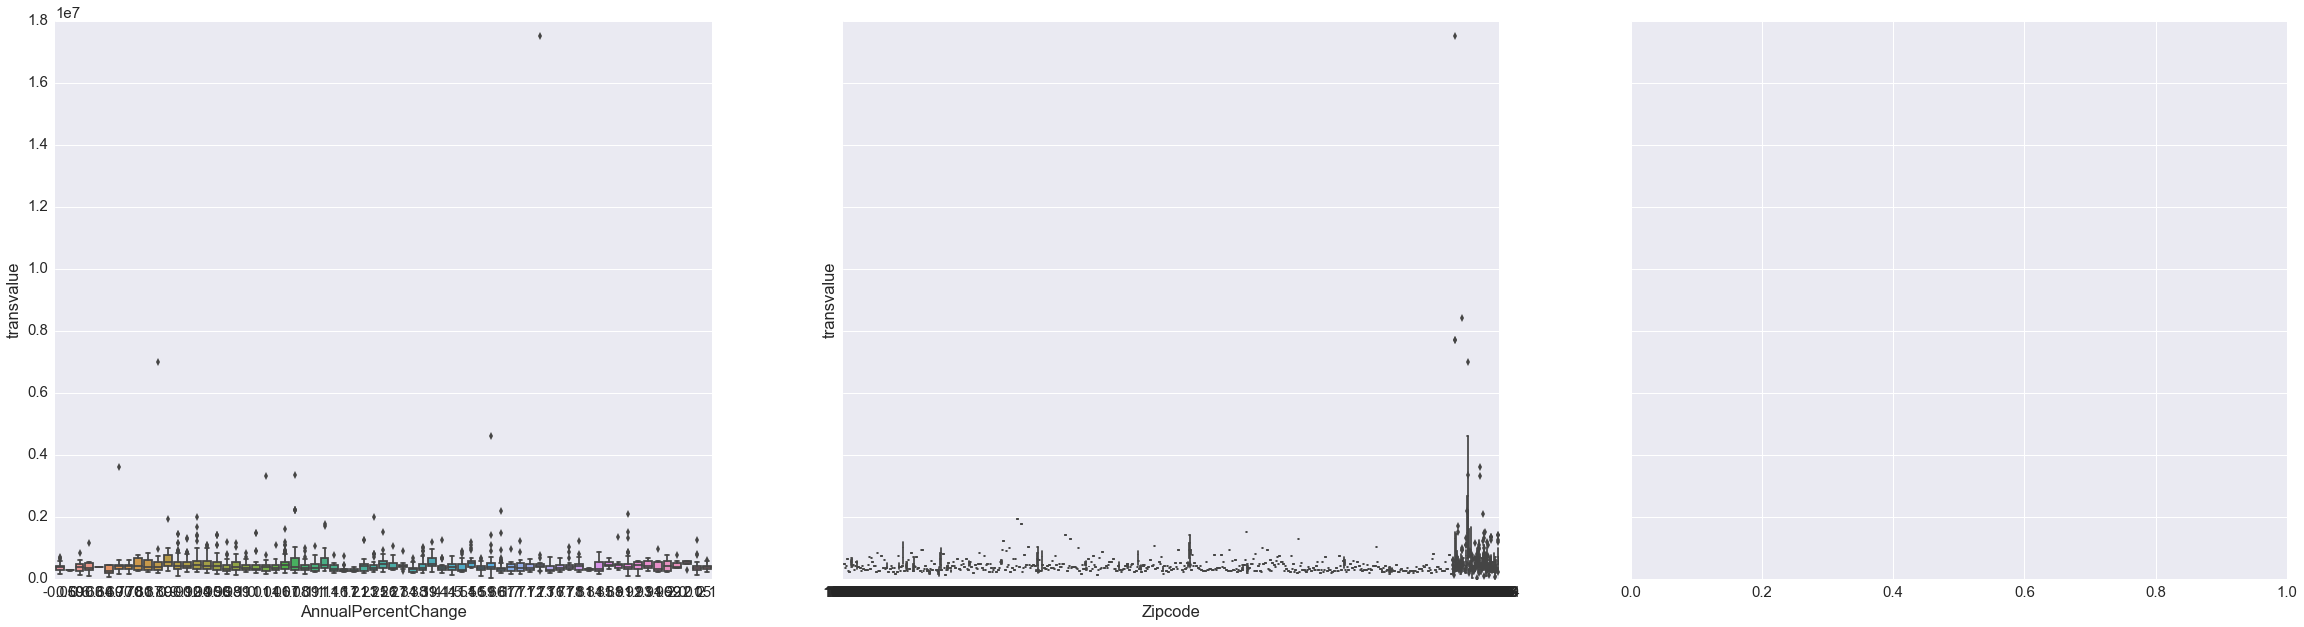

In [220]:
# Bivariate Analysis -Plots
ncol =3
nrow = 6
for i in range(nrow):
    fig,axs = plt.subplots(nrows=1,ncols=ncol,sharey=True,figsize=(40, 10))
    cols =zillow_train.columns[i*ncol:ncol*(i+1)]
    for i in range(len(axs)):
        axs[i].set(yscale="linear")
        sns.boxplot(x=cols[i],y=zillow_train.transvalue , data=zillow_train, ax=axs[i])
        axs[i].set(xlabel=cols[i], ylabel='transvalue')

In [ ]:

#One hot encode categorical variables because xgboost work only with numerical binary data for categoricals
train_str_dum = pd.get_dummies(train_str)
print(train_str_dum.columns)

In [ ]:

#One hot encode categorical variables because xgboost work only with numerical binary data for categoricals
test_str_dum = pd.get_dummies(test_str)
print(test_str_dum.columns)

In [ ]:
new_test = pd.merge(zillow_test,test_str_dum,left_index=True,right_index=True)
new_test.drop(['transdate_previous','transdate','viewtypeid_5.0'], axis=1, inplace=True)
print(new_test.columns.values)
new_test.shape

In [ ]:
#merge to form new test and train
new_train = pd.merge(big_X_imputed_train,train_str_dum,left_index=True,right_index=True)

print(new_train.columns.values)

y = new_train["transvalue"]
new_train.drop("transvalue", axis=1, inplace=True)

X_train, X_validation, y_train, y_validation = train_test_split( new_train,y , test_size=0.3, random_state=42)
X_train.info()


In [ ]:
#check imp features before moelling         
model = xgb.XGBRegressor()
every_column_exect_y= [col for col in X_train.columns if col not in ['transvalue','transdate','transdate_previous']]
best_xgb_model=model.fit(X_train[every_column_exect_y],y_train)

from collections import OrderedDict
OrderedDict(sorted(model.booster().get_fscore().items(), key=lambda t: t[1], reverse=True))              

In [ ]:
#Let's remove the less important ones
most_relevant_features= list( dict((k, v) for k, v in model.booster().get_fscore().items() if v >= 10).keys())
print(most_relevant_features)

In [ ]:
#plt imp features one vs one 
plt.scatter(train.transvalue_previous, train.Price_Appreciation, c = "blue", marker = "s")
plt.title("transvalue_previous vs Price_Appreciation")
plt.xlabel("transvalue_previous")
plt.ylabel("Price_Appreciation")
plt.show()

In [ ]:
#grid search for finding best hyperparameters 
from sklearn.grid_search import GridSearchCV

cv_params = {'max_depth': [3,5,7], 'min_child_weight': [1,3,5]}
ind_params = {'learning_rate': 0.1, 'n_estimators': 1000, 'seed':0, 'subsample': 0.8, 'colsample_bytree': 0.8, 

             'objective': 'reg:linear'}
optimized_GBM = GridSearchCV(xgb.XGBRegressor(**ind_params), 
                            cv_params, 
                            scoring = 'mean_absolute_error', cv = 5, n_jobs = -1) 
#Optimize for accuracy since that is the metric used in the Adult Data Set notation
#x_train.dump('')
optimized_GBM.fit(X_train[every_column_exect_y], y_train)

In [ ]:
    #check best hyperparameters
    print optimized_GBM.best_params_


In [ ]:
#do a CV of 5 fold with best hyperpapramters on whole training set
xgdmat = xgb.DMatrix(X_train[every_column_exect_y], y_train) 
#xgtrain=xgb.DMatrix(X_train[every_column_exect_y])


#our_params= {'min_child_weight: 0.5, learning_rate 0.01, n_estimators:10, max_depth:4',
 #'min_child_weight: 0.5, learning_rate 0.01, n_estimators:10, max_depth:4'}


our_params = {'eta': 0.1, 'seed':0, 'subsample': 0.8, 'colsample_bytree': 0.8, 
             'objective': 'reg:linear', 'max_depth':3, 'min_child_weight':1} 
#our_params = {'eta': 0.1, 'seed':0, 'subsample': 0.8, 'colsample_bytree': 0.8, 
            # 'objective': 'reg:linear', 'max_depth':3, 'min_child_weight':1} 
# Grid Search CV optimized settings

cv_xgb = xgb.cv(params = our_params, dtrain = xgdmat, num_boost_round = 4000, nfold = 5,
                metrics = ['rmse'], # Make sure you enter metrics inside a list or you may encounter issues!
                early_stopping_rounds = 100) # Look for early stopping that minimizes error


In [ ]:
#check the error rates for train and test and pick best n rounds for depending upon least test 
cv_xgb.tail(5)

In [ ]:
#train the model using xgboost usng best nrounds and hyperparameters derived from grid search and cv
our_params = {'eta': 0.1, 'seed':0, 'subsample': 0.8, 'colsample_bytree': 0.8, 
             'objective': 'reg:linear', 'max_depth':3, 'min_child_weight':1} 
xgtest=xgb.DMatrix(new_test[every_column_exect_y],missing=np.nan )
watchlist  = [ (xgdmat,'train'),(xgtest,'test')]
final_gb = xgb.train(our_params,xgdmat,num_boost_round = 3103)

In [ ]:
#draw feature importance graph
%matplotlib inline
import seaborn as sns
sns.set(font_scale = 1.5)

In [ ]:
xgb.plot_importance(final_gb)

In [ ]:
importances = final_gb.get_fscore()
importances
importance_frame = pd.DataFrame({'Importance': list(importances.values()), 'Feature': list(importances.keys())})
importance_frame.sort_values(by = 'Importance', inplace = True)
importance_frame.plot(kind = 'barh', x = 'Feature', figsize = (10,40), color = 'red')

In [ ]:


#predict value on Validation set to check the perfomance 
valmat=xgb.DMatrix(X_validation[every_column_exect_y])
y_pred_val = final_gb.predict(valmat)
y_pred_val.shape


xgtest=xgb.DMatrix(new_test[every_column_exect_y],missing=np.nan)
#predict value on actual test set 
y_pred = final_gb.predict(xgtest) # Predict using our testdmat

y_pred
#y_pred.shape



In [ ]:
from sklearn.metrics import mean_absolute_error
def performance_metric(y_true, y_predict):
    """ Calculates and returns the performance score between 
        true and predicted values based on the metric chosen. """
    # TODO: Calculate the performance score between 'y_true' and 'y_predict'
    MAE = (mean_absolute_error(y_true, y_predict))
    # Return the mae
    return MAE

In [ ]:
#check performance metric mae on validation to make sure model is not overfitting on training set and we do a bias variance trade-off 
performance_metric(y_validation,y_pred_val)

In [ ]:
df_results= pd.DataFrame()
df_results['propertyid']= zillow_test['propertyid']
df_results['transvalue']= y_pred
#write prediction to a csv file 
np.savetxt("Zillow_xgboost_latest_1.csv", df_results, delimiter=",")
df_results.shape